# Imports

In [65]:
from numpy.random import seed
seed(888)

import tensorflow
tensorflow.random.set_seed(404)

In [142]:
import os
import numpy as np
import tensorflow as tf
import itertools

import tensorflow.keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

from IPython.display import display
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [134]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS #32*32*3
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Get the Data

In [68]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

In [69]:
type(cifar10)
type(x_train_all)

numpy.ndarray

# Explore the Data

In [70]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

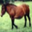

In [71]:
pic = array_to_img(x_train_all[7])
display(pic)

In [72]:
y_train_all.shape

(50000, 1)

In [73]:
# Labels of images (image at index 7 label (horse))
y_train_all[7][0]

7

In [74]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

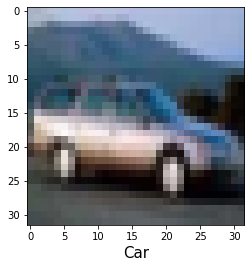

In [75]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAMES[y_train_all[4][0]], fontsize=15)
plt.show()

**Challenge:** Write a for loop to display the first 10 images from the `x_train_all` array in a row. Show the name of the label below the picture. Remove the ugly tick marks. Hint use matplotlib.

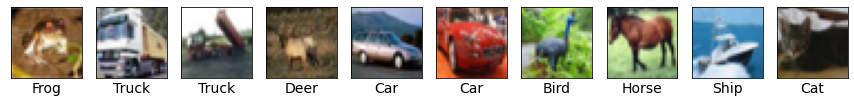

In [76]:
plt.figure(figsize=(15,5))

for i in range(10):
    plt.subplot(1,10, i+1)  #row, col, index
    
    # To show 10 images
    plt.imshow(x_train_all[i])
    
    # To hide the tick marks
    plt.xticks([])
    plt.yticks([])
    
    # To show label below image
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
    
    # To display
    plt.imshow(x_train_all[i])

In [77]:
x_train_all[0].shape

(32, 32, 3)

In [78]:
nr_images, x, y, c = x_train_all.shape
print(f'Training Images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

Training Images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [79]:
print(f'Testing Images = {x_test.shape[0]} \t| width = {x_test.shape[1]} \t| height = {x_test.shape[2]} \t| channels = {x_test.shape[3]}')

Testing Images = 10000 	| width = 32 	| height = 32 	| channels = 3


# Preprocess Data

In [80]:
# Image 0 pixel 0
r, g, b = x_train_all[0][0][0]
print('r = ',r)
print('g = ',g)
print('b = ',b)

r =  59
g =  62
b =  63


In [81]:
# Converting values from int to float
# 255 is the max color value
x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [82]:
# Image 0 pixel 0 (New float converted values)
r, g, b = x_train_all[0][0][0]
print('r = ',r)
print('g = ',g)
print('b = ',b)

r =  0.23137254901960785
g =  0.24313725490196078
b =  0.24705882352941178


In [83]:
# Reshaping the training images array
x_train_all = x_train_all.reshape(x_train_all.shape[0],  # 50000 images
                                  TOTAL_INPUTS)          # 32*32*3

In [84]:
x_train_all.shape

(50000, 3072)

In [85]:
# Reshaping the testing images array
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


### Create Validation Dataset

In [86]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]

x_val.shape

(10000, 3072)

**Challenge:** Create two numpy_arrays `x_train` and `y_train` that have the shape(40000,3072) and (40000,1) respectively. They need to contain the last values from `x_train_all` and `y_train_all` respectively.

In [87]:
x_train = x_train_all[VALIDATION_SIZE:]  #last 40,000 values
y_train = y_train_all[VALIDATION_SIZE:]

x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)

In [88]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

# Define the Neural Networks using Keras

In [89]:
model_1 = Sequential([
    # First Hidden Layer
    Dense(units = 128,   # Nr of neurons
          input_dim = TOTAL_INPUTS,
          activation = 'relu',
          name = 'm1_hidden1'),
    
    # Second Hidden Layer
    Dense(units = 64, activation = 'relu', name = 'm1_hidden2'),
    
    # Third Hidden Layer
    Dense(units = 16, activation = 'relu', name = 'm1_hidden3'),
    
    # Output Layer
    Dense(units = 10, activation = 'softmax', name = 'm1_output')       
])

# Compiling the model
model_1.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [90]:
# Initializing model_2
model_2 = Sequential()

# Adding Regularization(Dropout)
model_2.add(Dropout(rate=0.2, #Probability
                    seed=42,
                    input_shape=(TOTAL_INPUTS,)  #Input(Tuple)
                    ))

# Adding layers to it
model_2.add(Dense(128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(10, activation='softmax', name='m2_output'))

# Compiling the model
model_2.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

**Challenge:** Create a third model `model_3` that has 2 dropouts layers. The second dropout layer should be added after the first hidden layer and have a dropout rate of 25%.

In [91]:
# Initializing model_3
model_3 = Sequential()

# Adding Regularization(Dropout)
model_3.add(Dropout(rate=0.2, #Probability
                    seed=42,
                    input_shape=(TOTAL_INPUTS,)  #Input(Tuple)
                    ))

# Adding layers to it
model_3.add(Dense(128, activation='relu', name='m3_hidden1'))


# Adding another Regularization(Dropout)
model_3.add(Dropout(rate=0.25, #Probability
                    seed=42))   #No need to define nr of inputs, keras will identify automatically

model_3.add(Dense(64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(10, activation='softmax', name='m3_output'))

# Compiling the model
model_3.compile(optimizer = 'adam',
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [92]:
type(model_1)

tensorflow.python.keras.engine.sequential.Sequential

In [93]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [94]:
# width * height * color channels * Nr of neurons + bias params -> Layer 1
layer_1 = 32*32*3*128 + 128
layer_2 = 128*64 + 64
layer_3 = 64*16 + 16
output_layer = 16*10 + 10

total_params = layer_1+layer_2+layer_3+output_layer
print('Total params:',total_params)

Total params: 402810


# Tensorboard (Visualizing Learning)

In [95]:
def get_tensorboard(model_name):
    
    folder_name = f'{model_name} at {strftime("%H %M")}'

    # Creating path for folder
    dir_paths = os.path.join(LOG_DIR, folder_name)

    # Assigning path
    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory !!')


    # Setting up tensorboard
    return TensorBoard(log_dir=dir_paths)

# Fit the Model

In [96]:
samples_per_batch = 1000

In [97]:
'''
%%time

nr_epochs = 150
model_1.fit(x_train_xs, y_train_xs, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard('Model 1')],
            verbose = 0,  # Muting the output
            validation_data=(x_val, y_val))

'''

"\n%%time\n\nnr_epochs = 150\nmodel_1.fit(x_train_xs, y_train_xs, \n            batch_size = samples_per_batch,\n            epochs = nr_epochs,\n            callbacks = [get_tensorboard('Model 1')],\n            verbose = 0,  # Muting the output\n            validation_data=(x_val, y_val))\n\n"

In [98]:
'''
%%time

nr_epochs = 150
model_2.fit(x_train_xs, y_train_xs, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard('Model 2')],
            verbose = 0,  # Muting the output
            validation_data=(x_val, y_val))

'''

"\n%%time\n\nnr_epochs = 150\nmodel_2.fit(x_train_xs, y_train_xs, \n            batch_size = samples_per_batch,\n            epochs = nr_epochs,\n            callbacks = [get_tensorboard('Model 2')],\n            verbose = 0,  # Muting the output\n            validation_data=(x_val, y_val))\n\n"

In [99]:
%%time

#Reducing size from 150 to 100
nr_epochs = 100 

#Also from x_train_xs to x_train and y_train_xs to y_train
model_1.fit(x_train, y_train, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard('Model 1 XL')],
            verbose = 0,  # Muting the output
            validation_data=(x_val, y_val))

Successfully created directory !!
CPU times: user 5min 39s, sys: 28.5 s, total: 6min 7s
Wall time: 51.1 s


In [100]:
%%time

#Reducing size from 150 to 100
nr_epochs = 100 

#Also from x_train_xs to x_train and y_train_xs to y_train
model_2.fit(x_train, y_train, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard('Model 2 XL')],
            verbose = 0,  # Muting the output
            validation_data=(x_val, y_val))

Successfully created directory !!
CPU times: user 9min 45s, sys: 39.9 s, total: 10min 25s
Wall time: 1min 17s


In [101]:
%%time

#Reducing size from 150 to 100
nr_epochs = 100 

#Also from x_train_xs to x_train and y_train_xs to y_train
model_3.fit(x_train, y_train, 
            batch_size = samples_per_batch,
            epochs = nr_epochs,
            callbacks = [get_tensorboard('Model 3 XL')],
            verbose = 0,  # Muting the output
            validation_data=(x_val, y_val))

Successfully created directory !!
CPU times: user 9min 18s, sys: 2min 29s, total: 11min 47s
Wall time: 1min 30s


# Predictions on Individual Images

In [102]:
 # Validation data with 10,000 images and every image has 3072 values in it
x_val.shape

(10000, 3072)

In [103]:
# Extracting a single image
x_val[0]

array([0.231, 0.243, 0.247, ..., 0.482, 0.361, 0.282])

In [104]:
# Changing image dimension
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [105]:
# Set numpy array values precision size
np.set_printoptions(precision=3)

In [106]:
# Making predictions on above extracted image, returning all classes probabilities
model_2.predict(test)

array([[2.152e-02, 7.223e-03, 6.173e-02, 1.002e-01, 9.362e-02, 9.495e-02,
        5.215e-01, 9.750e-02, 1.612e-04, 1.685e-03]], dtype=float32)

In [107]:
model_2.predict(x_val).shape

(10000, 10)

In [116]:
# model_2.predict_classes(test)   # -> Deprecated 
np.argmax(model_2.predict(test), axis=-1)

array([6])

In [117]:
y_val[0]

array([6], dtype=uint8)

**Challenge:** Write a for loop where you print out the actual value and the predicted value for the first 10 images in the valuation dataset.

In [119]:
for number in range(10):
    test_img = np.expand_dims(x_val[number], axis=0)
    # predicted_val = model_2.predict_classes(test_img)[0]  # -> Deprecated 
    
    predicted_val = np.argmax(model_2.predict(test_img)[0], axis=-1)
    print(f'Actual value: {y_val[number][0]} vs. predicted: {predicted_val}')

Actual value: 6 vs. predicted: 6
Actual value: 9 vs. predicted: 1
Actual value: 9 vs. predicted: 9
Actual value: 4 vs. predicted: 6
Actual value: 1 vs. predicted: 8
Actual value: 1 vs. predicted: 9
Actual value: 2 vs. predicted: 2
Actual value: 7 vs. predicted: 7
Actual value: 8 vs. predicted: 8
Actual value: 3 vs. predicted: 9


# Evaluation

In [111]:
# List of metrics that model can calculate
model_2.metrics_names

['loss', 'accuracy']

In [112]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 0s 1ms/step - loss: 1.4669 - accuracy: 0.4797
Test loss is 1.47 and test accuracy is 48.0%


# Confusion Matrix

In [126]:
preditions = np.argmax(model_2.predict(x_test), axis=-1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=preditions)

In [127]:
conf_matrix.shape

(10, 10)

In [128]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [129]:
# Largest value in confusion matrix
conf_matrix.max()

652

In [130]:
# Smallest value in confusion matrix
conf_matrix.min()

3

In [147]:
# Extracting confusion matrix values
conf_matrix[0]

array([608,  21,  82,  20,  42,  17,  19,  30, 144,  17])

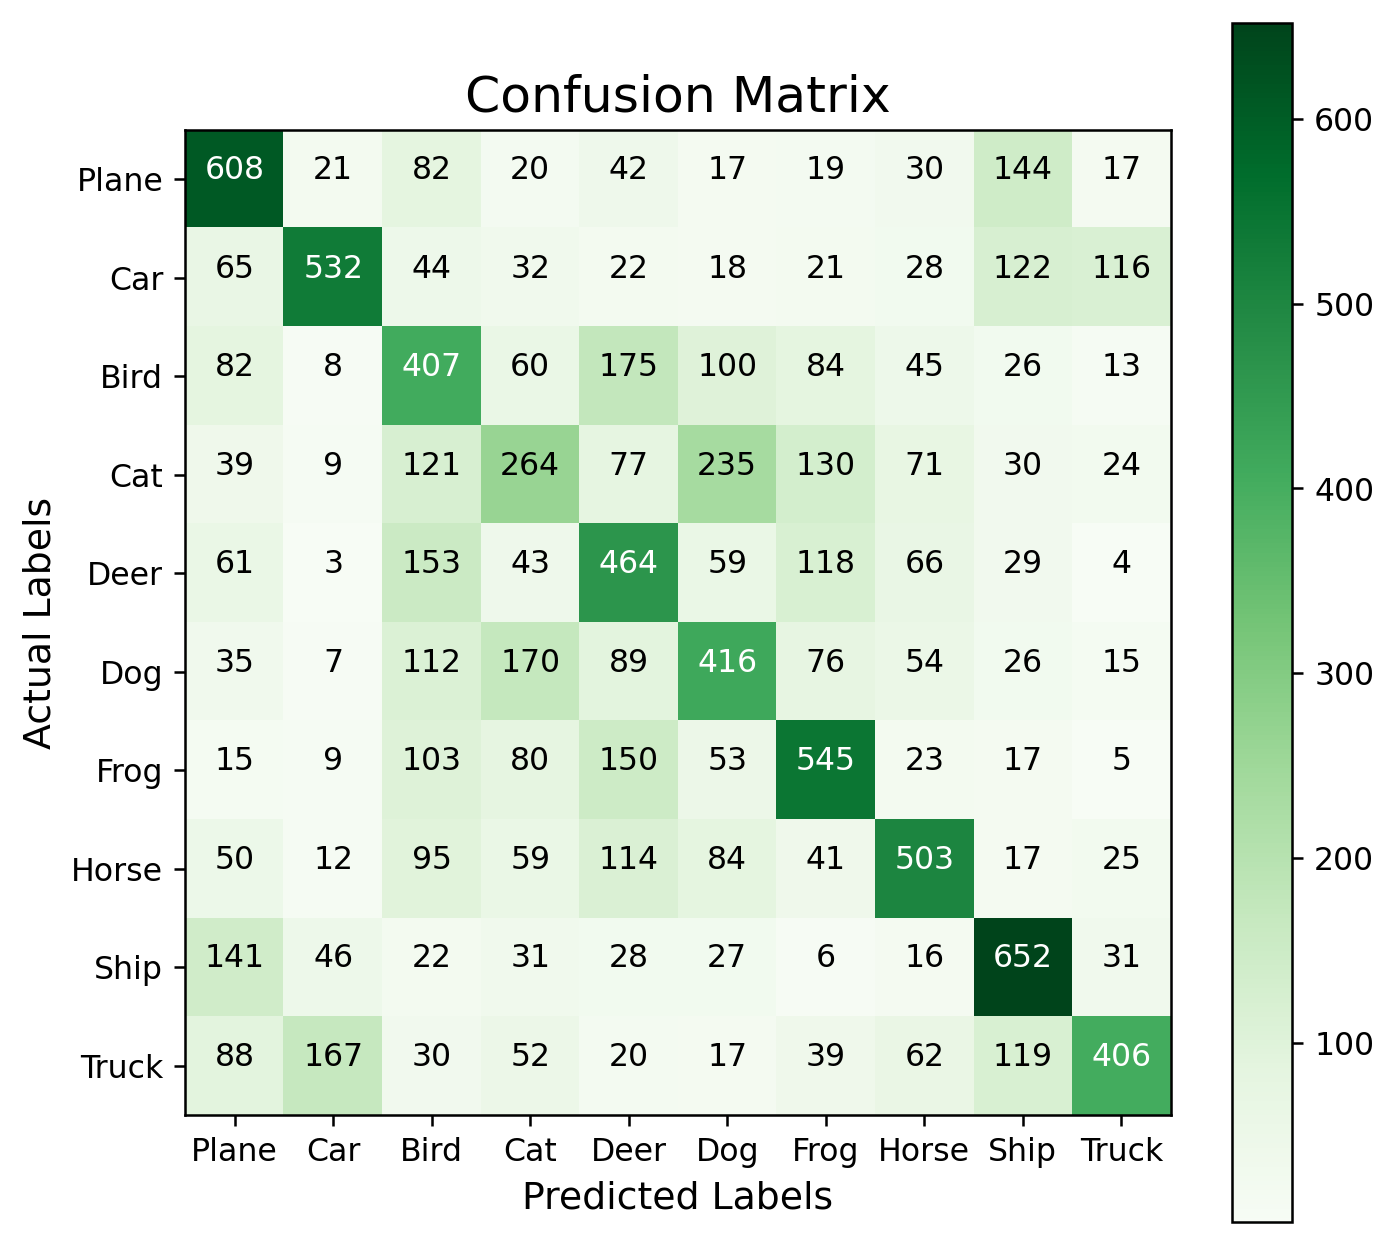

In [153]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

# Adding color bar
plt.colorbar()

# Plotting confusion matrix values in the plot using loop
for i,j in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(x=j, y=i, s=conf_matrix[i,j],
             horizontalalignment='center',  # To align values in center
             color='white' if conf_matrix[i,j] > conf_matrix.max()/2 else 'black')

plt.show()

**Challenge:** What do the numbers down the diagonal represent? What do the other numbers (excluding the number in the diagonal) in a single row represent? Try to identify the false positives, false negatives and the true positives in the confusion matrix.

In [154]:
# True positives  (all diagonal values)
np.diag(conf_matrix)

array([608, 532, 407, 264, 464, 416, 545, 503, 652, 406])

In [155]:
# False Negative (Summing recall for every single row)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.608, 0.532, 0.407, 0.264, 0.464, 0.416, 0.545, 0.503, 0.652,
       0.406])

In [156]:
# False Positive (Summing precision for every single col)
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.514, 0.654, 0.348, 0.326, 0.393, 0.405, 0.505, 0.56 , 0.552,
       0.619])

In [157]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 47.97%


**Challenge:** Calculate the average precision for the model as a whole. Print this out. Then calculate the f-score for the model as a whole.

In [158]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

Model 2 precision score is 48.75%


In [159]:
# F-score or f1

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 f score is 48.36%
